In [6]:
import os
import cv2
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

warnings.filterwarnings('ignore')

In [7]:
IMG_SIZE = (200,200)
IMAGE_PATH = os.path.join(os.getcwd(), 'Images')

In [8]:
labels_df = pd.read_csv('labels.txt', sep=' ', names=['image_name', 'rating'])

In [9]:
def find_rating(data_frame, name):
    if type(labels_df) != type(data_frame):
        raise Exception('entered type if not Data Frame')

    filt = data_frame['image_name'] == name
    temp_rows = data_frame[filt]
    if temp_rows.empty:
        return pd.NA

    return temp_rows['rating'].values[0]

def read_img(path, img_size, img_type):
    img_arr = cv2.imread(path)
    return cv2.resize(img_arr, img_size)

def make_feature_label_matrix(images_path, img_size=(200,200), img_type=None):
    features = np.zeros(shape=(len(os.listdir(images_path)), img_size[0], img_size[1], 3))
    labels = np.zeros(shape=(features.shape[0]), dtype='float')

    for i, img in enumerate(os.listdir(images_path)):
        img_path = os.path.join(images_path, img)
        features[i] = read_img(img_path, img_size, img_type)
        labels[i] = find_rating(labels_df, img)

    return features, labels
        
    

In [10]:
X, y = make_feature_label_matrix(IMAGE_PATH)

In [11]:
print(f'Shape of our feature matrix is {X.shape}')
print(f'Shape of our Labels matrix is {y.shape}')

Shape of our feature matrix is (5500, 200, 200, 3)
Shape of our Labels matrix is (5500,)


### Normalizing the features

In [12]:
X = X / 255

In [13]:
def plot_image(img_arr, cmap='gray'):
    plt.imshow(X=img_arr, cmap=cmap)

def plot_images_and_labels(X, y, n_image, cmap='gray'):
    temp_x, temp_y = shuffle(X,y)

    fig, axes = plt.subplots(nrows=n_image // 2 + 1, ncols=2, figsize=(8, 15))
    axes = axes.flatten()

    for i in range(n_image):
        axes[i].imshow(temp_x[i], cmap=cmap)
        axes[i].set_title(f'Beauty rating is {temp_y[i]}')

    for ax in axes:
        if not ax.has_data():
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

def plot_predictions(X, y, pred, n_image, cmap='gray'):
    temp_x, temp_y, temp_pred = shuffle(X,y,pred)

    fig, axes = plt.subplots(nrows=n_image, ncols=1, figsize=(8, 15))
    axes = axes.flatten()

    for i in range(n_image):
        axes[i].imshow(temp_x[i], cmap=cmap)
        axes[i].set_title(f'Beauty rating is {temp_y[i]} and we predicted {round(temp_pred[i], 2)}')

    for ax in axes:
        if not ax.has_data():
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()
    

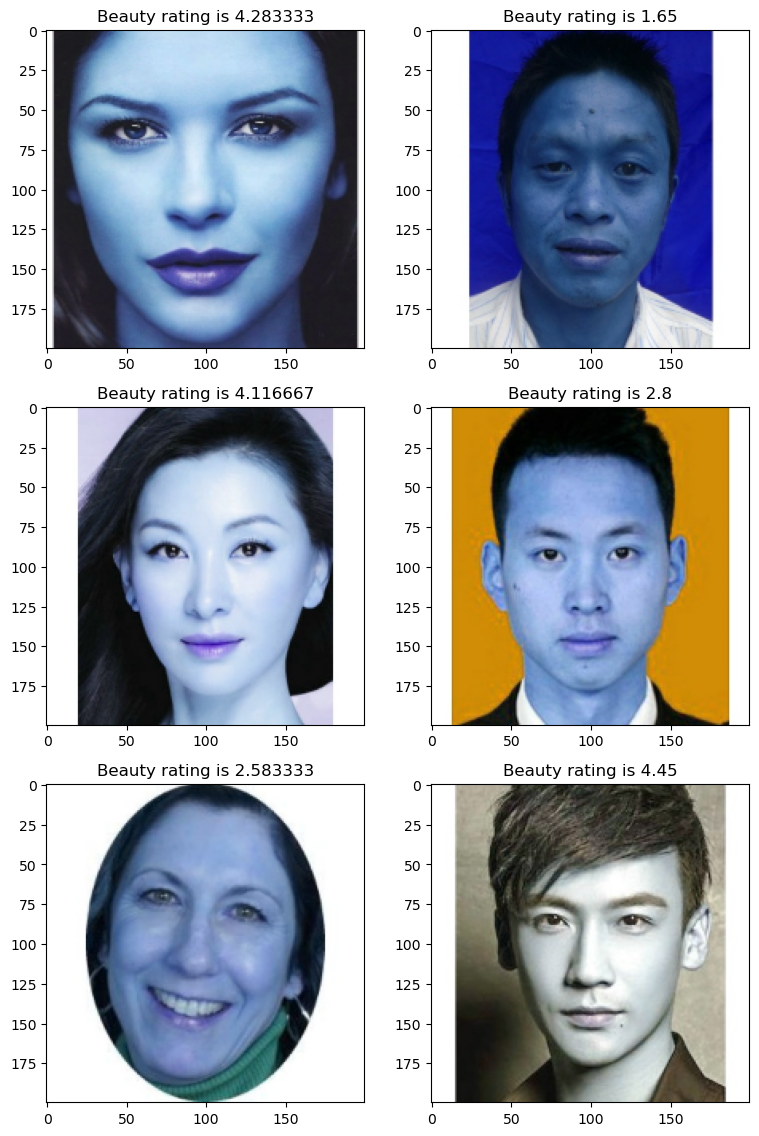

In [14]:
plot_images_and_labels(X, y, 6)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
Model = Sequential()

Model.add(Conv2D(64, (3,3), input_shape=(200, 200, 3)))
Model.add(Activation('tanh'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3,3)))
Model.add(Activation('tanh'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3,3)))
Model.add(Activation('tanh'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128, (3,3)))
Model.add(Activation('tanh'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))


Model.add(Conv2D(128, (3,3)))
Model.add(Activation('tanh'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(64, (3,3)))
Model.add(Activation('tanh'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())

Model.add(Dense(1))


Model.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
History = Model.fit(X_train, y_train, epochs = 15, validation_split = 0.1)

Epoch 1/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - loss: 1.6654 - val_loss: 0.5235
Epoch 2/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - loss: 0.9215 - val_loss: 0.4764
Epoch 3/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - loss: 0.8120 - val_loss: 1.0941
Epoch 4/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - loss: 0.7446 - val_loss: 0.4831
Epoch 5/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - loss: 0.6613 - val_loss: 0.4844
Epoch 6/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - loss: 0.6273 - val_loss: 0.7567
Epoch 7/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - loss: 0.5868 - val_loss: 0.4482
Epoch 8/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - loss: 0.5528 - val_loss: 0.4589
Epoch 9/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - loss: 0.5310 - val_loss: 0.4520
Epoch 10/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - loss: 0.4860 - val_loss: 0.4570
Epoch 11/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - loss: 0.5068 - val_loss: 0.4547
Epoch 12/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 

In [26]:
Model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.4308


0.46458137035369873

In [27]:
predictions = Model.predict(X_test)
predictions = np.round(predictions.reshape(-1), 2)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step


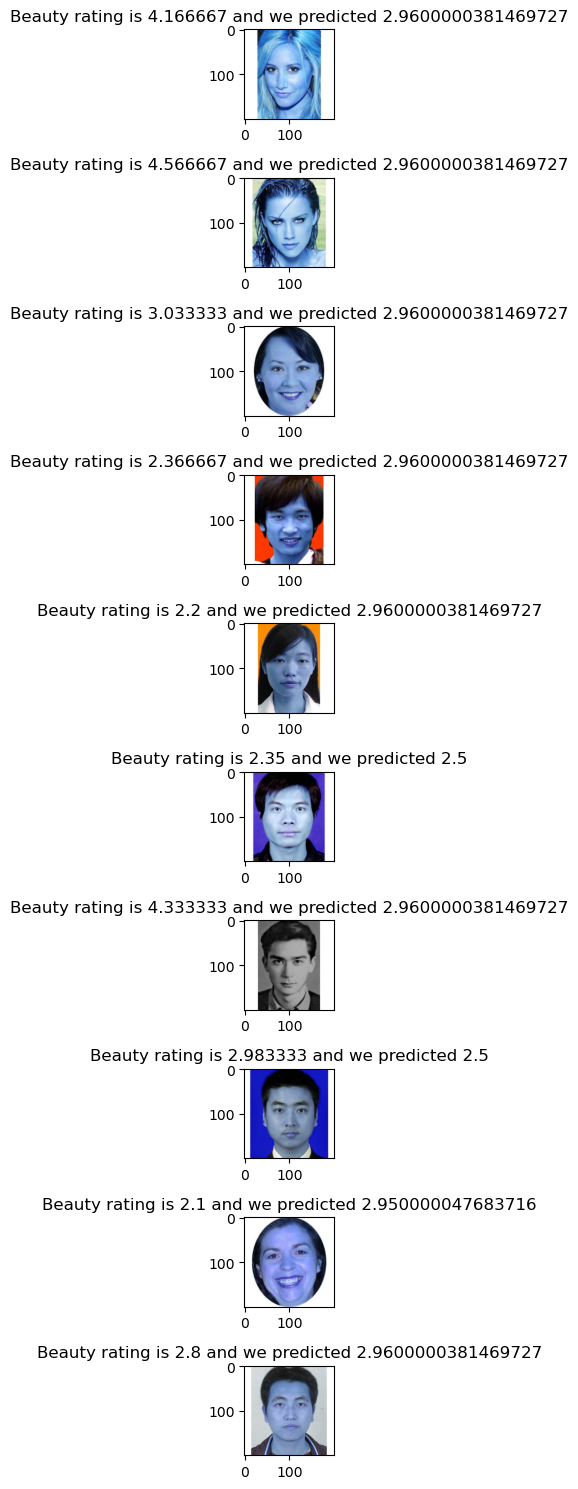

In [28]:
plot_predictions(X_test, y_test, predictions, 10)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
comparison_df['Difference'] = abs(comparison_df['Actual'] - comparison_df['Predicted'])
comparison_df['True/False'] = comparison_df['Difference'] < 0.8
true_observations = comparison_df[comparison_df['True/False'] == True]
Accuracy = (len(true_observations) / len(y_test)) * 100
print(f'Accuracy : {round(Accuracy,2)}%')

Accuracy : 71.64%
